# Facebook Prophet Library

In [28]:
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('BeerWineLiquor.csv')

In [7]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    324 non-null    object
 1   beer    324 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [9]:
df.columns = ['ds', 'y']

In [10]:
df.head()

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [11]:
df['ds'] = pd.to_datetime(df['ds'])

In [31]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      324 non-null    datetime64[ns]
 1   y       324 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [14]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [15]:
future = m.make_future_dataframe(periods=24,freq='MS')

In [16]:
future

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01
...,...
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01


In [17]:
len(df)

324

In [18]:
len(future)

348

In [19]:
forecast = m.predict(future)

In [20]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1775.057120,1158.352449,1472.292491,1775.057120,1775.057120,-461.942020,-461.942020,-461.942020,-461.942020,-461.942020,-461.942020,0.0,0.0,0.0,1313.115100
1,1992-02-01,1777.777820,1190.487852,1494.460011,1777.777820,1777.777820,-427.917548,-427.917548,-427.917548,-427.917548,-427.917548,-427.917548,0.0,0.0,0.0,1349.860272
2,1992-03-01,1780.322991,1440.228418,1773.159218,1780.322991,1780.322991,-179.332380,-179.332380,-179.332380,-179.332380,-179.332380,-179.332380,0.0,0.0,0.0,1600.990611
3,1992-04-01,1783.043691,1419.052915,1747.878579,1783.043691,1783.043691,-196.385214,-196.385214,-196.385214,-196.385214,-196.385214,-196.385214,0.0,0.0,0.0,1586.658476
4,1992-05-01,1785.676626,1658.814096,1994.515477,1785.676626,1785.676626,45.045239,45.045239,45.045239,45.045239,45.045239,45.045239,0.0,0.0,0.0,1830.721866


In [21]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [22]:
forecast[['ds','yhat_lower','yhat_upper','yhat']].tail(12)

,ds,yhat_lower,yhat_upper,yhat
336,2020-01-01,4465.703415,4789.300045,4628.495065
337,2020-02-01,4527.370801,4844.815502,4678.598917
338,2020-03-01,4783.455182,5123.115039,4942.226086
339,2020-04-01,4775.321779,5113.770055,4941.252632
340,2020-05-01,5036.199404,5360.971872,5198.243777
341,2020-06-01,5023.771518,5338.992016,5179.564229
342,2020-07-01,5156.314354,5471.476444,5312.269322
343,2020-08-01,5074.096937,5397.058431,5241.365856
344,2020-09-01,4930.602074,5253.742502,5084.397594
345,2020-10-01,5036.299465,5349.176164,5189.396886


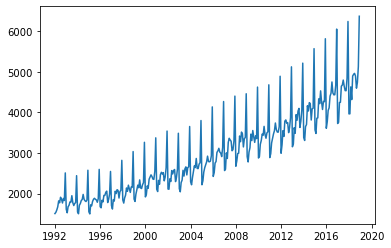

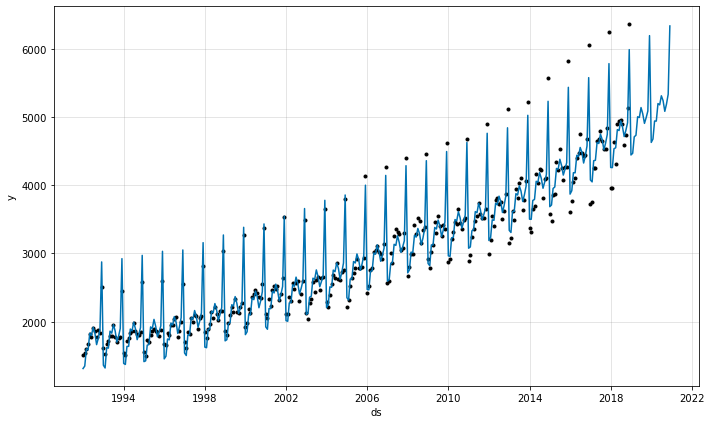

In [38]:
%matplotlib inline
plt.plot(df['ds'],  df['y'])
m.plot(forecast[['ds','yhat_lower','yhat_upper','yhat']], uncertainty= False,plot_cap=False);
plt.show()